In [1]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np

In [2]:
data = pd.read_csv('overdoses.csv', sep =',')
print("The shape of the data is :",data.shape)
data.head()

The shape of the data is : (50, 4)


State  Population Deaths Abbrev
0     Alabama   4,833,722    723     AL
1      Alaska     735,132    124     AK
2     Arizona   6,626,624  1,211     AZ
3    Arkansas   2,959,373    356     AR
4  California  38,332,521  4,521     CA

In [3]:
'''
Creating OOD Column
'''

data['Population'] = data['Population'].str.replace(',', '')
data['Deaths'] = data['Deaths'].str.replace(',', '')
data[data.columns[1:3]] = data[data.columns[1:3]].astype(int)
data.dtypes

State         object
Population     int64
Deaths         int64
Abbrev        object
dtype: object

In [4]:
'''
Plotting Pearson correlation coefficient btw Population and Deaths
'''

data[data.columns[1:3]].corr(method ='pearson')

Population    Deaths
Population    1.000000  0.939921
Deaths        0.939921  1.000000

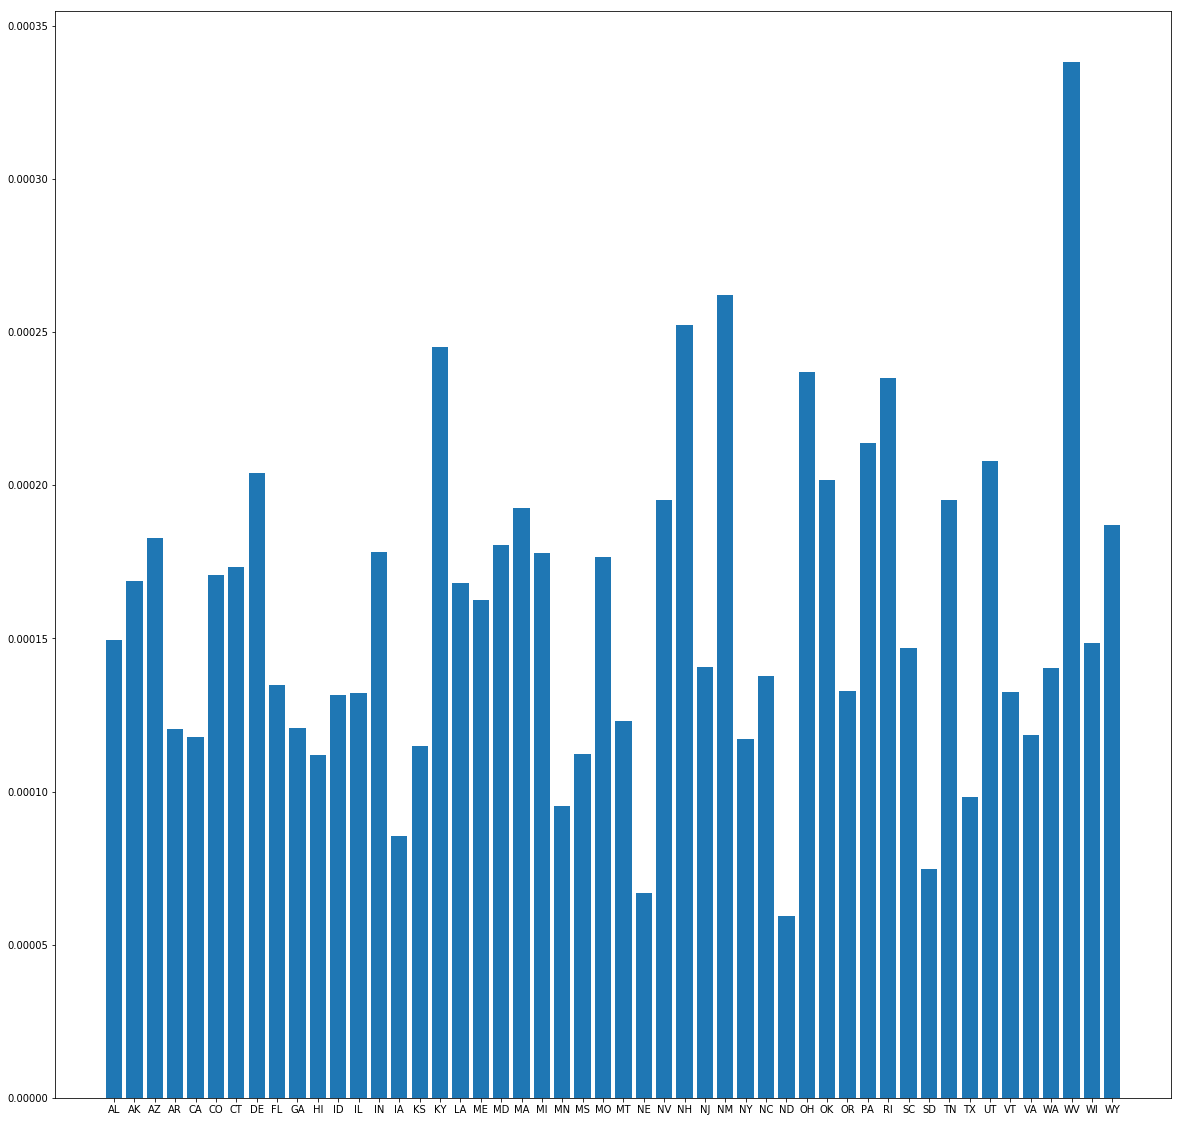

In [5]:
'''
Plotting Bar graph for OOD
'''

data['OOD'] = data['Deaths']/data['Population']
py.figure(figsize=(20,20))
py.bar(np.arange(50), data['OOD'])
py.xticks(np.arange(50), data['Abbrev'])
py.show()

In [6]:
'''
Creating 50x50 distance Matrix
'''

sim_data = pd.DataFrame(data['Abbrev'])
for i in range(50):
    sim_data[i] =  data['OOD'] - data.iloc[i, -1]
print("The shape of the matrix is : ", sim_data.shape)
sim_data.head()

The shape of the matrix is :  (50, 51)


Abbrev         0         1         2         3         4         5  \
0     AL  0.000000 -0.000019 -0.000033  0.000029  0.000032 -0.000021   
1     AK  0.000019  0.000000 -0.000014  0.000048  0.000051 -0.000002   
2     AZ  0.000033  0.000014  0.000000  0.000062  0.000065  0.000012   
3     AR -0.000029 -0.000048 -0.000062  0.000000  0.000002 -0.000050   
4     CA -0.000032 -0.000051 -0.000065 -0.000002  0.000000 -0.000053   

          6         7         8    ...           40        41        42  \
0 -0.000024 -0.000055  0.000015    ...     0.000075 -0.000046  0.000051   
1 -0.000005 -0.000035  0.000034    ...     0.000094 -0.000027  0.000070   
2  0.000010 -0.000021  0.000048    ...     0.000108 -0.000013  0.000084   
3 -0.000053 -0.000084 -0.000014    ...     0.000046 -0.000075  0.000022   
4 -0.000055 -0.000086 -0.000017    ...     0.000043 -0.000077  0.000020   

         43        44            45        46        47        48        49  
0 -0.000058  0.000017  3.093593e-05  0.000009 -0.000189  0.000001 -0.000037  
1 -0.000039  0.000036  5.003894e-05  0.000028 -0.000169  0.000020 -0.000018  
2 -0.000025  0.000050  6.410940e-05  0.000042 -0.000155  0.000034 -0.000004  
3 -0.000088 -0.000012  1.657501e-06 -0.000020 -0.000218 -0.000028 -0.000067  
4 -0.000090 -0.000015 -6.966210e-07 -0.000022 -0.000220 -0.000031 -0.000069  

[5 rows x 51 columns]

In [7]:
'''
Scaling and Using Cosine Funciton for Similarity Matrix 
'''

sim_data.iloc[:, 1:] = sim_data.iloc[:, 1:].abs()
sim_data.iloc[:, 1:] = sim_data.iloc[:, 1:]*100000
sim_data.iloc[:, 1:] = sim_data.iloc[:, 1:]/max(sim_data.iloc[:, 1:].max(axis = 1))
sim_data.iloc[:, 1:] = np.cos(sim_data.iloc[:, 1:])
sim_data.head()

Abbrev         0         1         2         3         4         5  \
0     AL  1.000000  0.997652  0.992924  0.994487  0.993565  0.997144   
1     AK  0.997652  1.000000  0.998726  0.984969  0.983475  0.999975   
2     AZ  0.992924  0.998726  1.000000  0.974997  0.973085  0.999057   
3     AR  0.994487  0.984969  0.974997  1.000000  0.999964  0.983727   
4     CA  0.993565  0.983475  0.973085  0.999964  1.000000  0.982174   

          6         7         8    ...           40        41        42  \
0  0.996395  0.980880  0.998578    ...     0.964000  0.986540  0.983151   
1  0.999866  0.991906  0.992582    ...     0.943523  0.995423  0.968323   
2  0.999419  0.997050  0.985182    ...     0.925601  0.998977  0.954487   
3  0.982006  0.955064  0.998662    ...     0.986568  0.963953  0.996899   
4  0.980376  0.952527  0.998190    ...     0.987913  0.961671  0.997528   

         43        44        45        46        47        48        49  
0  0.978203  0.998114  0.993845  0.999462  0.779714  0.999993  0.990961  
1  0.990128  0.991565  0.983924  0.994868  0.820769  0.997390  0.997822  
2  0.995940  0.983761  0.973658  0.988494  0.848552  0.992475  0.999880  
3  0.951035  0.999048  0.999982  0.997391  0.709756  0.994870  0.971430  
4  0.948390  0.998644  0.999997  0.996746  0.703781  0.993980  0.969390  

[5 rows x 51 columns]

In [8]:
'''
Appending the Abbrevations to form 51x51 Matrix
'''

l = ['Abbrev']
for i in range(50):
    l.append(data['Abbrev'][i])    
final_sim = pd.DataFrame(l)
final_sim = final_sim.transpose()
final_sim.columns = sim_data.columns
final_sim = pd.concat([final_sim, sim_data], axis = 0)
print("The shape of the Similarity matrix is :", final_sim.shape)
final_sim

The shape of the Similarity matrix is : (51, 51)


Abbrev         0         1         2         3         4         5  \
0   Abbrev        AL        AK        AZ        AR        CA        CO   
0       AL         1  0.997652  0.992924  0.994487  0.993565  0.997144   
1       AK  0.997652         1  0.998726  0.984969  0.983475  0.999975   
2       AZ  0.992924  0.998726         1  0.974997  0.973085  0.999057   
3       AR  0.994487  0.984969  0.974997         1  0.999964  0.983727   
4       CA  0.993565  0.983475  0.973085  0.999964         1  0.982174   
5       CO  0.997144  0.999975  0.999057  0.983727  0.982174         1   
6       CT  0.996395  0.999866  0.999419  0.982006  0.980376  0.999956   
7       DE   0.98088  0.991906   0.99705  0.955064  0.952527  0.992776   
8       FL  0.998578  0.992582  0.985182  0.998662   0.99819  0.991701   
9       GA  0.994636  0.985215  0.975314  0.999999  0.999951  0.983983   
10      HI  0.990837   0.97926  0.967788  0.999537  0.999759  0.977808   
11      ID  0.997898  0.991117  0.983142  0.999192  0.998816  0.990155   
12      IL  0.998092  0.991518  0.983696  0.999064  0.998663  0.990578   
13      IN   0.99467  0.999396  0.999876  0.978373   0.97659  0.999616   
14      IA  0.973625  0.955712  0.939642  0.992182  0.993201  0.953615   
15      KS   0.99219  0.981317  0.970357    0.9998  0.999933  0.979937   
16      KY  0.941907    0.9627  0.975128  0.901493  0.897805  0.964583   
17      LA  0.997819  0.999997  0.998597  0.985396  0.983923  0.999955   
18      ME  0.998906  0.999763  0.997391  0.988494  0.987181  0.999585   
19      MD  0.993859  0.999104  0.999967  0.976777  0.974932  0.999378   
20      MA  0.988109   0.99632  0.999376  0.966538  0.964337  0.996899   
21      MI  0.994781  0.999433  0.999858  0.978597  0.976824  0.999646   
22      MN  0.981153  0.965614  0.951263  0.996006  0.996725  0.963757   
23      MS  0.991083  0.979629  0.968247  0.999591  0.999797   0.97819   
24      MO  0.995325  0.999603  0.999751  0.979709  0.977981  0.999776   
25      MT  0.995502  0.986676  0.977208  0.999948  0.999827  0.985505   
26      NE  0.956318   0.93405  0.914837    0.9817  0.983274   0.93151   
27      NV  0.986552   0.99543  0.998981  0.963973  0.961691  0.996078   
28      NH  0.932743  0.955247  0.968958  0.889792  0.885905  0.957307   
29      NJ  0.999504     0.995  0.988692  0.997295  0.996639  0.994272   
30      NM  0.919286  0.944085  0.959521  0.872944  0.868792  0.946385   
31      NY  0.993194  0.982885  0.972335  0.999932  0.999995  0.981562   
32      NC  0.999122  0.993906  0.987077  0.998007  0.997438  0.993105   
33      ND  0.948156  0.924163  0.903707  0.976255   0.97805  0.921448   
34      OH  0.951033   0.96997  0.981009  0.913377  0.909906   0.97166   
35      OK    0.9825   0.99295  0.997667  0.957551  0.955082  0.993761   
36      OR  0.998194  0.991735  0.983997   0.99899  0.998575  0.990807   
37      PA  0.973501  0.986878  0.993769  0.944152  0.941335  0.987991   
38      RI  0.953496  0.971901  0.982541  0.916632  0.913223  0.973535   
39      SC  0.999951  0.996924  0.991698  0.995477  0.994639  0.996347   
40      SD     0.964  0.943523  0.925601  0.986568  0.987913  0.941165   
41      TN   0.98654  0.995423  0.998977  0.963953  0.961671  0.996072   
42      TX  0.983151  0.968323  0.954487  0.996899  0.997528  0.966539   
43      UT  0.978203  0.990128   0.99594  0.951035   0.94839  0.991091   
44      VT  0.998114  0.991565  0.983761  0.999048  0.998644  0.990627   
45      VA  0.993845  0.983924  0.973658  0.999982  0.999997  0.982641   
46      WA  0.999462  0.994868  0.988494  0.997391  0.996746   0.99413   
47      WV  0.779714  0.820769  0.848552  0.709756  0.703781  0.824774   
48      WI  0.999993   0.99739  0.992475   0.99487   0.99398  0.996856   
49      WY  0.990961  0.997822   0.99988   0.97143   0.96939  0.998262   

           6         7         8    ...           40        41        42  \
0         CT        DE        FL    ...           SD        TN        TX   
0  